In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [50]:
# 讀取資料
df = pd.read_csv("boston_house_prices.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [51]:
# 'MEDV'是目標欄位
y = df['MEDV']
X = df.drop('MEDV', axis=1)

# 資料前處理(缺失值檢查、MinMax正規化、資料切割)

In [52]:
# 檢查數據集中的缺失值
missing_values = df.isnull().sum()
print("缺失值統計：")
print(missing_values[missing_values > 0])

# 如果有缺失值，使用平均值填充
if missing_values.sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

缺失值統計：
Series([], dtype: int64)


In [53]:
# 列印原始資料集的平均值和標準差
print("原始資料集的平均值：")
print(df.mean())
print("\n原始資料集的標準差：")
print(df.std())
# MinMax正規化
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# 列印正規化後的平均值和標準差
print("\n正規化後的平均值：")
print(X_scaled.mean())
print("\n正規化後的標準差：")
print(X_scaled.std())

原始資料集的平均值：
CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

原始資料集的標準差：
CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

正規化後的平均值：
CRIM       0.040544
ZN         0.113636
INDUS      0.391378
CHAS       0.069170
NOX        0.349167
RM         0.521869
AGE        0.676364
DIS        0.242381
RAD        0.371713
TAX        0.422208
PTRATIO    0.622929
B          0.898568
LSTAT      0.301409
dtype: float64

正規化後的標準差：
CRIM       0.096679
ZN         0.2

In [54]:
# 切割數據集為訓練集和測試集
#Data拆80% & 20%至Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBOOST模型建構

In [55]:
# 建立XGBoost模型
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
# 預測
y_pred = model.predict(X_test)

In [57]:
# 計算原始資料績效指標
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAPE: 0.10536624699449404
RMSE: 2.62854171840299
R2: 0.9057837838492537


In [58]:
# 特徵重要性
feature_importances = model.feature_importances_
print("\n特徵重要性：")
for col, imp in zip(X.columns, feature_importances):
    print(f"{col}: {imp}")


特徵重要性：
CRIM: 0.036415647715330124
ZN: 0.0029477791395038366
INDUS: 0.01015847735106945
CHAS: 0.00758212897926569
NOX: 0.024681078270077705
RM: 0.40330278873443604
AGE: 0.011991804465651512
DIS: 0.06351681053638458
RAD: 0.02167651243507862
TAX: 0.046922195702791214
PTRATIO: 0.035251419991254807
B: 0.010268994607031345
LSTAT: 0.3252844214439392


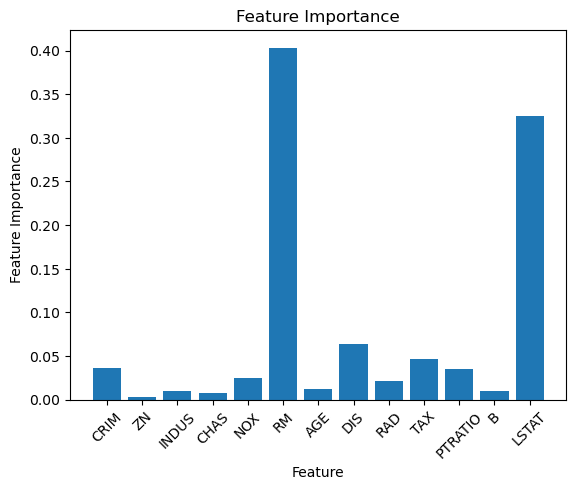

In [71]:
plt.bar(X.columns, feature_importances)
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [62]:
# 找到最大和最小特徵重要性的特徵名稱和值
max_importance = max(feature_importances)
min_importance = min(feature_importances)
max_feature = X.columns[np.argmax(feature_importances)]
min_feature = X.columns[np.argmin(feature_importances)]

print(f"最大特徵重要性: {max_feature} - {max_importance}")
print(f"最小特徵重要性: {min_feature} - {min_importance}")

最大特徵重要性: RM - 0.40330278873443604
最小特徵重要性: ZN - 0.0029477791395038366


# 選擇重要性大於平均重要性的特徵，將其特徵刪除作為重新訓練的模型

In [67]:
# 根據特徵重要性進行特徵篩選，選擇重要性大於平均重要性的特徵，要將其特徵刪除作為重新訓練的模型
important_features = X.columns[feature_importances > feature_importances.mean()]
X_important_train = X_train[important_features]
X_important_test = X_test[important_features]

print("選擇的重要特徵：")
print(important_features)

選擇的重要特徵：
Index(['RM', 'LSTAT'], dtype='object')


In [64]:
# 使用篩選後的特徵重新訓練模型
model.fit(X_important_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
# 重新預測
y_pred_important = model.predict(X_important_test)

In [66]:
# 計算績效指標
mape_important = mean_absolute_percentage_error(y_test, y_pred_important)
rmse_important = np.sqrt(mean_squared_error(y_test, y_pred_important))
r2_important = r2_score(y_test, y_pred_important)

print(f"\n使用重要特徵後的MAPE: {mape_important}")
print(f"使用重要特徵後的RMSE: {rmse_important}")
print(f"使用重要特徵後的R2: {r2_important}")


使用重要特徵後的MAPE: 0.20331576851033625
使用重要特徵後的RMSE: 5.19634028323425
使用重要特徵後的R2: 0.631793817589758


In [70]:
# 列印績效比較表格
performance_comparison = pd.DataFrame({
    "Metric": ["MAPE", "RMSE", "R2"],
    "Original Model": [mape, rmse, r2],
    "Reduced Features Model": [mape_important, rmse_important, r2_important]
})

print(performance_comparison)

  Metric  Original Model  Reduced Features Model
0   MAPE        0.105366                0.203316
1   RMSE        2.628542                5.196340
2     R2        0.905784                0.631794


# 選擇最小的三個特徵(不重要)和最大的三個特徵(最重要)，將其特徵刪除作為重新訓練的模型

In [73]:
# 獲取最重要和最不重要的3個特徵
important_features = np.argsort(feature_importances)[-3:]
least_important_features = np.argsort(feature_importances)[:3]
print("最重要的3個特徵：", X.columns[important_features])
print("最不重要的3個特徵：", X.columns[least_important_features])

最重要的3個特徵： Index(['DIS', 'LSTAT', 'RM'], dtype='object')
最不重要的3個特徵： Index(['ZN', 'CHAS', 'INDUS'], dtype='object')


In [74]:
# 刪除最大三個特徵(最重要的3個特徵)
X_train_reduced_max = X_train.drop(X_train.columns[important_features], axis=1)
X_test_reduced_max = X_test.drop(X_test.columns[important_features], axis=1)

In [75]:
# 使用刪除最重要特徵後的數據重新訓練模型
model.fit(X_train_reduced_max, y_train)
y_pred_reduced_max = model.predict(X_test_reduced_max)

In [77]:
# 計算刪除最重要特徵後模型的績效指標
mape_reduced_max = mean_absolute_percentage_error(y_test, y_pred_reduced_max)
rmse_reduced_max = np.sqrt(mean_squared_error(y_test, y_pred_reduced_max))
r2_reduced_max = r2_score(y_test, y_pred_reduced_max)
print(f"\n使用重要特徵後的MAPE: {mape_reduced_max}")
print(f"使用重要特徵後的RMSE: {rmse_reduced_max}")
print(f"使用重要特徵後的R2: {r2_reduced_max}")


使用重要特徵後的MAPE: 0.14615995550202368
使用重要特徵後的RMSE: 4.862350129187862
使用重要特徵後的R2: 0.6776049487706655


In [78]:
# 刪除最小三個特徵(最不重要的3個特徵)
X_train_reduced_min = X_train.drop(X_train.columns[least_important_features], axis=1)
X_test_reduced_min = X_test.drop(X_test.columns[least_important_features], axis=1)

In [79]:
model.fit(X_train_reduced_min, y_train)
y_pred_reduced_min = model.predict(X_test_reduced_min)

In [80]:
# 計算刪除最不重要特徵後模型的績效指標
mape_reduced_min = mean_absolute_percentage_error(y_test, y_pred_reduced_min)
rmse_reduced_min = np.sqrt(mean_squared_error(y_test, y_pred_reduced_min))
r2_reduced_min = r2_score(y_test, y_pred_reduced_min)
print(f"\n使用重要特徵後的MAPE: {mape_reduced_min}")
print(f"使用重要特徵後的RMSE: {rmse_reduced_min}")
print(f"使用重要特徵後的R2: {r2_reduced_min}")


使用重要特徵後的MAPE: 0.10146242910399951
使用重要特徵後的RMSE: 2.640539782491016
使用重要特徵後的R2: 0.9049217148981055


In [81]:
# 列印績效比較
print("刪除最重要特徵後的績效:")
print(f"MAPE: {mape_reduced_max}, RMSE: {rmse_reduced_max}, R2: {r2_reduced_max}")

print("\n刪除最不重要特徵後的績效:")
print(f"MAPE: {mape_reduced_min}, RMSE: {rmse_reduced_min}, R2: {r2_reduced_min}")

刪除最重要特徵後的績效:
MAPE: 0.14615995550202368, RMSE: 4.862350129187862, R2: 0.6776049487706655

刪除最不重要特徵後的績效:
MAPE: 0.10146242910399951, RMSE: 2.640539782491016, R2: 0.9049217148981055


# 績效比較表

In [86]:
# 列印績效比較表格
performance_comparison = pd.DataFrame({
    "Metric": ["MAPE", "RMSE", "R2"],
    "Original Model": [mape, rmse, r2],
    "Above Avg Removed": [mape_important, rmse_important, r2_important],
    "Top 3 Removed": [mape_reduced_max, rmse_reduced_max, r2_reduced_max],
    "Bottom 3  Removed": [mape_reduced_min, rmse_reduced_min, r2_reduced_min]
})

print(performance_comparison)

  Metric  Original Model  Above Avg Removed  Top 3 Removed  Bottom 3  Removed
0   MAPE        0.105366           0.203316       0.146160           0.101462
1   RMSE        2.628542           5.196340       4.862350           2.640540
2     R2        0.905784           0.631794       0.677605           0.904922
